**Funções da Questão 2**

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def coefs(x,y, show_cfs=False):
    dim = np.shape(x)

    d = np.zeros((dim[0],dim[0]-1))
    d = np.concatenate((y, d),1)
    #print(d)

    for i in range(1, dim[0]):
        for j in range(0, dim[0]-i):
            #print(f'i: {i} | j: {j}')
            d[j][i] = (d[j+1][i-1] - d[j][i-1]) / (x[j+i][0] - x[j][0])
           
    if show_cfs:
      print("\n",d)
    return d

#============================================================================
#P = t[0][0] + t[0][1]*(p-x[0][0]) + t[0][2]*(p-x[0][0])*(p-x[1][0]) 
#    + t[0][3]*(p-x[0][0])*(p-x[1][0])*(p-x[2][0])

def interpolacaoNewton(a,x,cfs):
  S = cfs[0][0]
  dim = np.shape(x)
  for i in range(1, dim[0]):
    prod = 1
    for j in range(0 ,i):
      prod = prod * (a - x[j][0])
    
    S += cfs[0][i]*prod

  return S
#============================================================================
def interpolacaoLagrange(a,x,y):
  dim = np.shape(x)
  S = 0
  for i in range(0, dim[0]):
    L = 1
    for j in range(0, dim[0]):
      if i != j:
        L = L * (a-x[j])/(x[i]-x[j])

    S = S + y[i]*L

  return S

#============================================================================
def PolErro(cfs, x, a):
  dim = np.shape(x)
  if dim[0] < 3:
    return 'ERRO'
  else:
    S = 0
    f3 = cfs[0][3]
    produtorio = 1

    for i in range(0, dim[0]):
      produtorio = produtorio * (a-x[i])

    S = f3 * produtorio

    return S


In [ ]:
x = np.array([
      [3.7],
      [4.6],
      [5.6],
      [5.7],
      [6.7],
      [7.5],
      [8.1]        
])

y = np.array([
          [-5.06],
          [0.293],
          [5.25] ,
          [5.51],
          [5.29],
          [2.46],
          [0.0597]   
])

**Q 3.1**

In [ ]:
t = interpolacaoLagrange( 4.9, x, y)
print('\nValor do polinômio pela Interpolção de Lagrange: ',t)


Valor do polinômio pela Interpolção de Lagrange:  [2.12932672]


In [ ]:
cfs = coefs(x, y)

P = interpolacaoNewton(4.9, x, cfs)

print("\nValor do polinômio pela Interpolção de Newton: ",P)

print("\nPolinômio erro: ", PolErro(cfs, x, 4.9))


Valor do polinômio pela Interpolção de Newton:  2.129326722959198

Polinômio erro:  [-0.00017729]


**Q 3.2**

In [ ]:
novo_x = float(input("Novo ponto em x: "))
novo_y = float(input("Novo ponto em y: "))

x_new = np.array([
      [3.7],
      [4.6],
      [5.6],
      [5.7],
      [6.7],
      [7.5],
      [8.1],
      [novo_x]
])

y_new = np.array([
          [-5.06],
          [0.293],
          [5.25] ,
          [5.51],
          [5.29],
          [2.46],
          [0.0597],
          [novo_y] 
])

cfs = coefs(x_new, y_new)

P = interpolacaoNewton(4.9, x_new, cfs)

print("\nValor do polinômio pela Interpolção de Newton com um ponto a mais: ",P)

print("\nPolinômio erro com um ponto a mais:  ", PolErro(cfs, x_new, 4.9))

Novo ponto em x: 2
Novo ponto em y: 1

Valor do polinômio pela Interpolção de Newton com um ponto a mais:  2.1302581689843896

Polinômio erro com um ponto a mais:   [-5.31856077e-05]


**Q4**

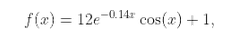

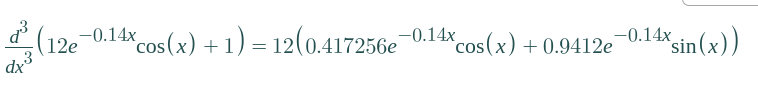

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 12 * np.exp(-0.14*x)*np.cos(x) + 1

def f3(x):
  return 12*(0.417256*np.exp(-0.14*x)*np.cos(x) + 0.9412*np.exp(-0.14*x)*np.sin(x))


def PolErro(maior, x, a):
  dim = np.shape(x)
  
  S = 0
  d3 = f3(maior)
  produtorio = 1

  for i in range(0, dim[0]):
    produtorio = produtorio * (a-x[i][0])

  S = d3 * produtorio

  return S/6


Valor máximo no intervalo: -1.4822575806787384


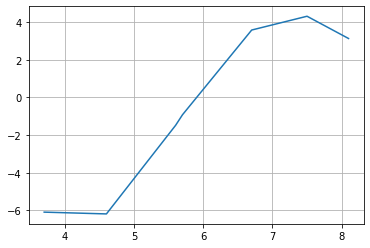

In [30]:
x = np.array([[3.7], [4.6],[5.6],[5.7],[6.7],[7.5],[8.1]])

#x = np.array([[3.7],[4.6],[5.6]])

y = f3(x)

print(f'Valor máximo no intervalo: {f3(x[2][0])}')

plt.plot(x, y)
plt.grid()
plt.show()

In [31]:
maior = -9999
dim = np.shape(x)
for i in range(0, dim[0]):
  if maior < x[i][0]:
    maior = x[i][0]

er = PolErro(maior, x, maior)

print(er)

0.0


In [33]:
Resp3_2 = 2.1302581689843896
Valor_real = f(4.9)

print(f'erro : {np.abs((Resp3_2-Valor_real)/Valor_real)}')

erro : 0.0014842154785952447
